In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df_index=pd.read_csv("economic_index.csv")


In [4]:
df_index.head()

,Unnamed: 0,year,month,interes_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
# drop unecessary
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [7]:
df_index.isnull().sum()

interes_rate         0
unemployment_rate    0
index_price          0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


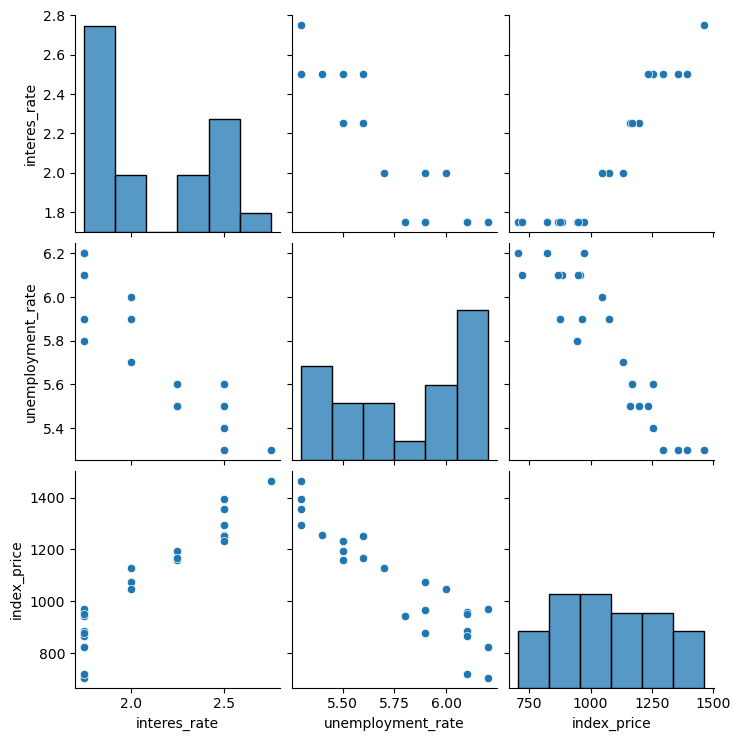

In [8]:
## Visualization

import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interes_rate,unemployment_rate,index_price
interes_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

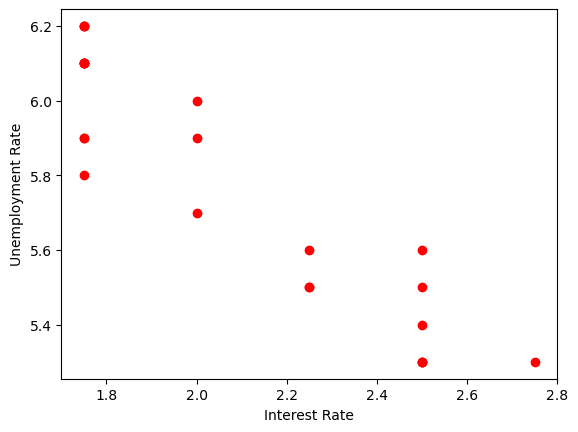

In [ ]:
#Visualie datapoints closely
plt.scatter(df_index['interes_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [16]:
## Independent and dependent features

# X=df_index[['interes_rate'],['unemployment_rate']]
#or 

X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [17]:
X.head() #Independent features

,interes_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y.head() # Dependent features

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [20]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
# new kind of plot 
import seaborn as sns 

<Axes: xlabel='interes_rate', ylabel='index_price'>

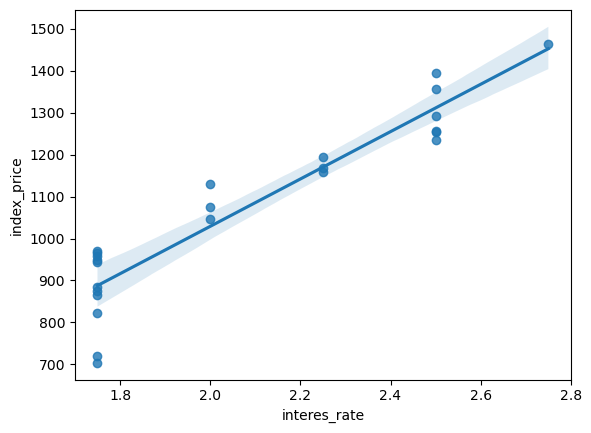

In [28]:
sns.regplot(x=df_index['interes_rate'],y=df_index['index_price'])
# In this the shaded region shows us that that we can hyperparamater tune it
# the line show idea about the error 

<Axes: xlabel='interes_rate', ylabel='unemployment_rate'>

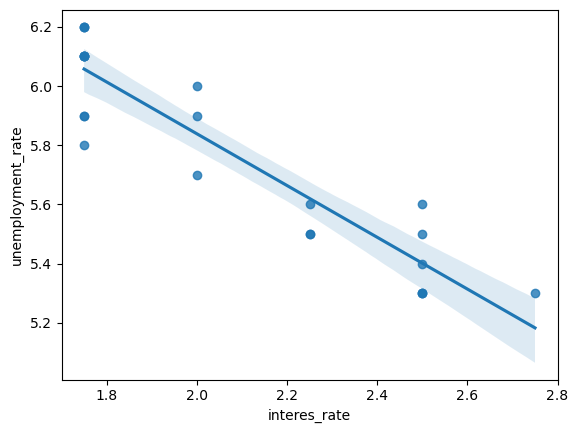

In [32]:
sns.regplot(x=df_index['interes_rate'],y=df_index['unemployment_rate'])

In [33]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [36]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()


In [38]:
regression.fit(X_train,y_train)

LinearRegression()

In [41]:
# Cross Val score
from sklearn.model_selection import cross_val_score


validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [42]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [43]:

np.mean(validation_score)

-5914.8281801623925

In [44]:
# Prediction
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [45]:
# Performance Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


#Display adjusted R-Squared 
print(1 - ( 1- score)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


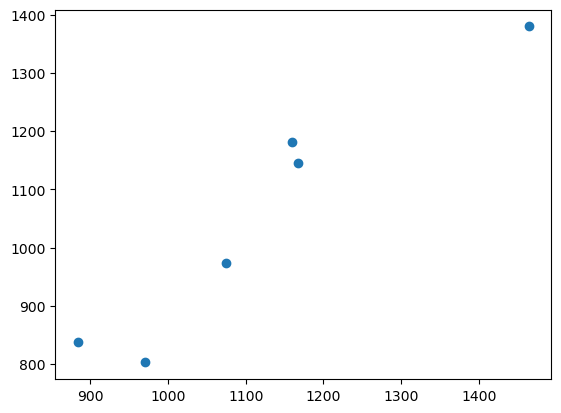

In [48]:
# Assumptions
plt.scatter(y_test,y_pred)

In [49]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


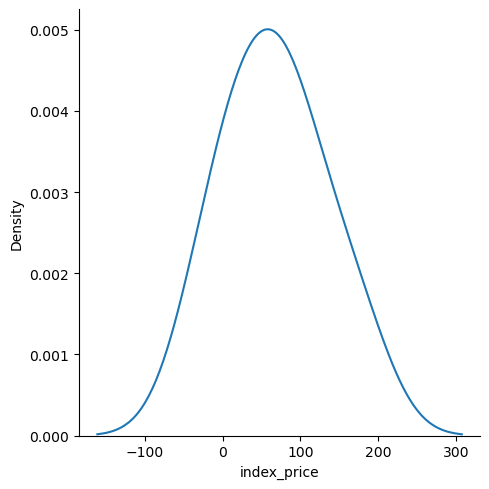

In [53]:
# plot residuals

sns.displot(residuals,kind='kde')

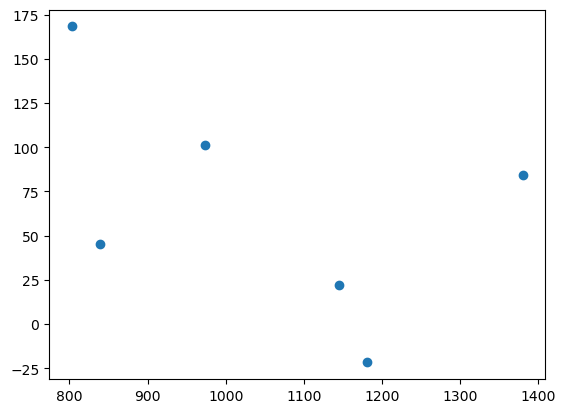

In [54]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [55]:
# OLS in multi
import statsmodels.api as sm 
model=sm.OLS(y_train,X_train).fit()


In [57]:
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 06 Mar 2025   Prob (F-statistic):                       0.754
Time:                        11:49:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print(regression.coef_)

[  88.27275507 -116.25716066]
